In [2]:
from torchvision.datasets import Cityscapes
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [119]:
dataset = Cityscapes("./data/", split="val", mode="fine", target_type="semantic")
dataset

Dataset Cityscapes
    Number of datapoints: 500
    Root location: ./data/
    Split: val
    Mode: gtFine
    Type: ['semantic']

In [120]:
type(dataset[0][1])

PIL.PngImagePlugin.PngImageFile

In [121]:
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )

In [122]:
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

## Find number of pixels for each class

In [124]:
np.array(dataset[0][1])

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)

In [135]:
arrays = []

for i in range(len(dataset)):
    annotation = dataset[i][1]
    arrays.append(np.array(annotation))

In [152]:
def check_unique(arrays):
    combined_array = np.concatenate(arrays)

    # Counting the occurrences of each unique value
    unique, counts = np.unique(combined_array, return_counts=True)

    # Creating a dictionary from the unique values and their counts
    occurrences = dict(zip(unique, counts))

    # Printing the occurrences
    return occurrences

In [153]:
occurrences = check_unique(arrays)
occurrences

{0: 375854,
 1: 51330054,
 2: 19784166,
 3: 15817000,
 4: 15650152,
 5: 4449872,
 6: 18676902,
 7: 345264442,
 8: 49568652,
 9: 4151398,
 10: 638410,
 11: 201005428,
 12: 6718315,
 13: 7521741,
 14: 38838,
 15: 312193,
 17: 13565658,
 18: 78175,
 19: 1808393,
 20: 6098373,
 21: 158868008,
 22: 7625026,
 23: 30765347,
 24: 11913424,
 25: 1975596,
 26: 59731217,
 27: 2760211,
 28: 3563120,
 29: 53411,
 30: 201086,
 31: 1031648,
 32: 729415,
 33: 6504475}

In [10]:
import matplotlib.pyplot as plt

# Provided label data
def plot_occurrences(counts):
    labels = [
        'unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 
        'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 
        'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 
        'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 
        'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 
        'train', 'motorcycle', 'bicycle', 'license plate'
    ]

    # Filter labels and counts to include only those present in the counts dictionary
    filtered_labels = [label for i, label in enumerate(labels) if i in counts]
    filtered_counts = [counts[i] for i in range(len(labels)) if i in counts]

    # Create the matplotlib bar chart
    plt.figure(figsize=(15, 8))
    plt.bar(filtered_labels, filtered_counts)
    plt.xlabel('Labels')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.tight_layout()  # Adjust layout to fit all labels
    plt.show()

In [ ]:
plot_occurrences(occurrences)

## Find how many instances of each class in the instance dataset

In [3]:
dataset_instance = Cityscapes("./data/", split="train", mode="fine", target_type="instance")
dataset_instance 

Dataset Cityscapes
    Number of datapoints: 2975
    Root location: ./data/
    Split: train
    Mode: gtFine
    Type: ['instance']

In [4]:
arrays_instance = []

for i in range(len(dataset_instance)):
    annotation = dataset_instance[i][1]
    arrays_instance.append(np.array(annotation))

In [5]:
def count_unique_objects_in_unique_array(array):
    for num in array: 
        if num < 50:
            continue; 
        class_id = str(num)[:2]
        class_id = int(class_id)
        value = counter_dict.get(class_id)
        if value is None:
            counter_dict[class_id] = 0
        counter_dict[class_id] = counter_dict.get(class_id) + 1

In [6]:
len(arrays_instance)

2975

In [7]:
counter_dict = {}
for array in arrays_instance:
    unique_arr = np.unique(array)
    count_unique_objects_in_unique_array(unique_arr)
counter_dict

{24: 17900,
 26: 26929,
 32: 735,
 33: 3655,
 25: 1754,
 28: 379,
 30: 76,
 27: 482,
 31: 168,
 29: 61}

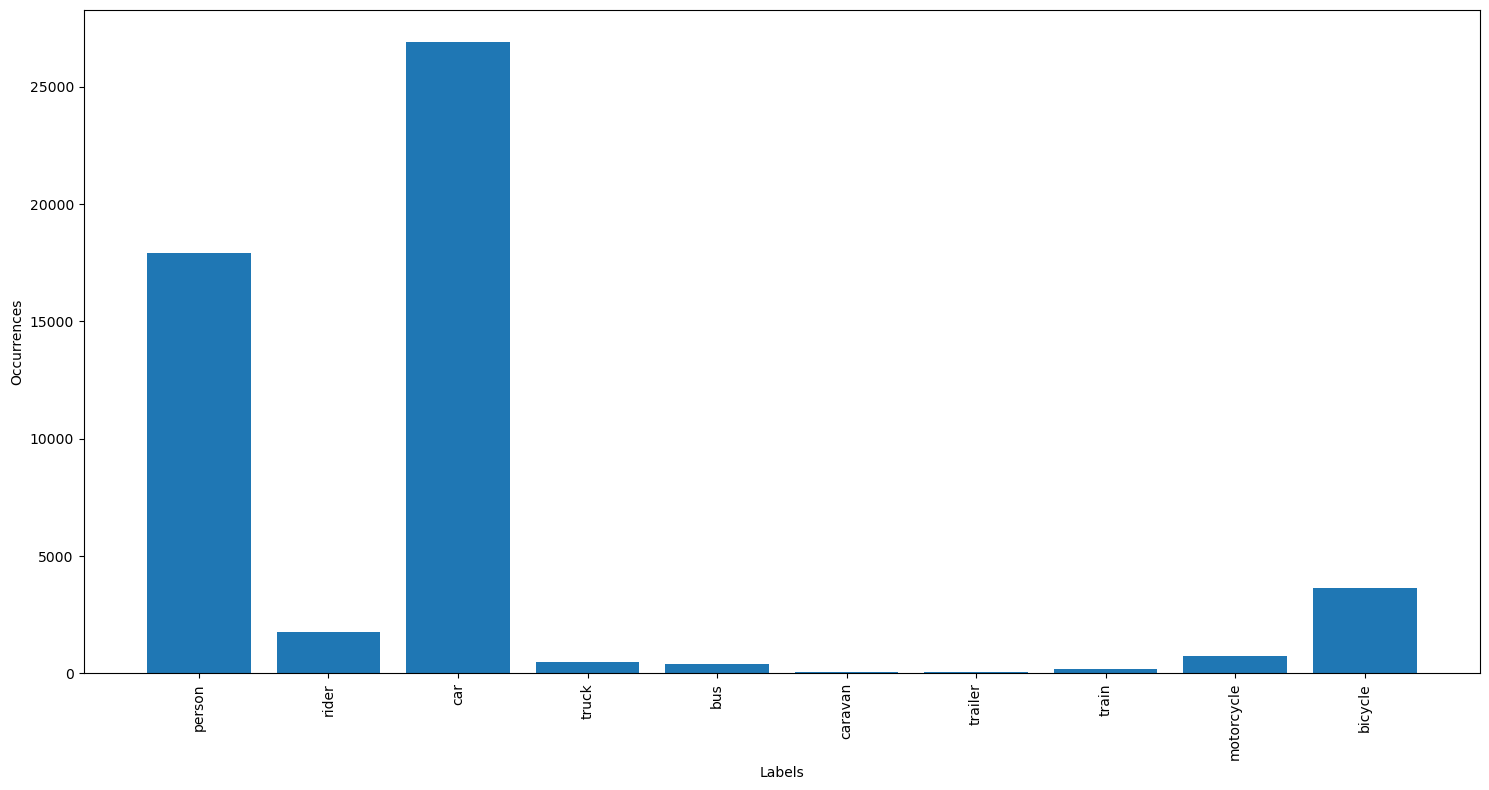

In [11]:
plot_occurrences(counter_dict)